In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karasburg
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | hualmay
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | agadir
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | corralillo
Processing Record 17 of Set 1 | machaneng
Processing Record 18 of Set 1 | patacamaya
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | provideniya
Processing Record 23 of Set 1 | bethel
Pro

Processing Record 39 of Set 4 | keffi
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | gushikawa
Processing Record 42 of Set 4 | viligili
City not found. Skipping...
Processing Record 43 of Set 4 | safaga
Processing Record 44 of Set 4 | catia la mar
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | tulagi
Processing Record 48 of Set 4 | adelaide
Processing Record 49 of Set 4 | porto santo
Processing Record 50 of Set 4 | hobart
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | jumla
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | benguela
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | riohacha
Processing Record 11 of Set 5 | nhamunda
Processing Record 12 of Set 5 | n

Processing Record 28 of Set 8 | goure
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | aureliana
Processing Record 31 of Set 8 | vaitape
Processing Record 32 of Set 8 | kununurra
Processing Record 33 of Set 8 | ciudad bolivar
Processing Record 34 of Set 8 | paita
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | falealupo
City not found. Skipping...
Processing Record 37 of Set 8 | kyra
Processing Record 38 of Set 8 | praia
Processing Record 39 of Set 8 | hovd
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | penzance
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | dubuque
Processing Record 44 of Set 8 | azovskaya
Processing Record 45 of Set 8 | nyagan
Processing Record 46 of Set 8 | muros
Processing Record 47 of Set 8 | sidney
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | bihoro
Processing Record 50 of Set 8 | touros
Processing Record 1 of Set 9 | mae hong son
Proc

Processing Record 16 of Set 12 | biak
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | chateau-thierry
Processing Record 19 of Set 12 | mariel
Processing Record 20 of Set 12 | tucurui
Processing Record 21 of Set 12 | noumea
Processing Record 22 of Set 12 | gamba
Processing Record 23 of Set 12 | imeni poliny osipenko
Processing Record 24 of Set 12 | diffa
Processing Record 25 of Set 12 | formosa
Processing Record 26 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 27 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 28 of Set 12 | karaul
City not found. Skipping...
Processing Record 29 of Set 12 | morristown
Processing Record 30 of Set 12 | zatoka
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | letlhakane
Processing Record 33 of Set 12 | kushima
Processing Record 34 of Set 12 | valea nucarilor
Processing Record 35 of Set 12 | esmeraldas
Processing Record 36 of Set 12 | chilliwack
Processing Record

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karasburg,-28.0167,18.7500,80.83,34,99,5.39,NA,2022-03-09 22:22:16
1,New Norfolk,-42.7826,147.0587,56.75,67,11,1.01,AU,2022-03-09 22:22:16
2,Rikitea,-23.1203,-134.9692,78.85,68,46,7.31,PF,2022-03-09 22:22:17
3,Taltal,-25.4000,-70.4833,70.05,74,23,5.50,CL,2022-03-09 22:22:17
4,Salalah,17.0151,54.0924,73.49,73,0,3.44,OM,2022-03-09 22:22:17
5,Hualmay,-11.0964,-77.6139,75.24,74,86,10.09,PE,2022-03-09 22:22:18
6,Busselton,-33.6500,115.3333,69.04,56,89,7.78,AU,2022-03-09 22:22:18
7,Castro,-24.7911,-50.0119,69.19,87,98,3.49,BR,2022-03-09 22:22:18
8,Ilulissat,69.2167,-51.1000,5.02,66,40,8.05,GL,2022-03-09 22:22:19
9,Kruisfontein,-34.0033,24.7314,73.42,65,73,18.23,ZA,2022-03-09 22:22:19


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_column_order]

In [8]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karasburg,NA,2022-03-09 22:22:16,-28.0167,18.7500,80.83,34,99,5.39
1,New Norfolk,AU,2022-03-09 22:22:16,-42.7826,147.0587,56.75,67,11,1.01
2,Rikitea,PF,2022-03-09 22:22:17,-23.1203,-134.9692,78.85,68,46,7.31
3,Taltal,CL,2022-03-09 22:22:17,-25.4000,-70.4833,70.05,74,23,5.50
4,Salalah,OM,2022-03-09 22:22:17,17.0151,54.0924,73.49,73,0,3.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

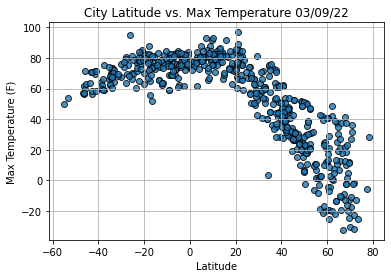

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

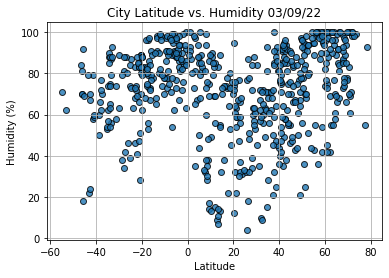

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

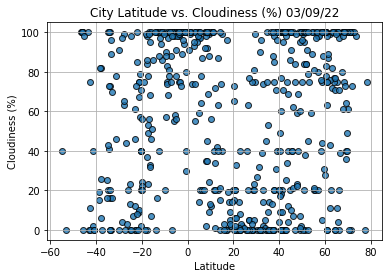

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

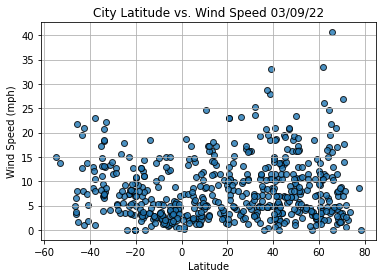

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Salalah,OM,2022-03-09 22:22:17,17.0151,54.0924,73.49,73,0,3.44
8,Ilulissat,GL,2022-03-09 22:22:19,69.2167,-51.1000,5.02,66,40,8.05
11,Victoria,HK,2022-03-09 22:19:54,22.2855,114.1577,66.25,77,14,13.71
12,Agadir,MA,2022-03-09 22:21:07,30.4202,-9.5982,55.85,84,27,4.36
13,Pevek,RU,2022-03-09 22:22:20,69.7008,170.3133,12.02,78,49,8.86


In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

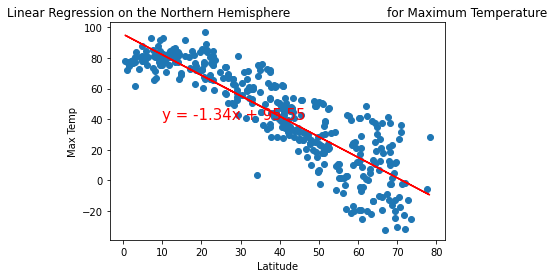

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

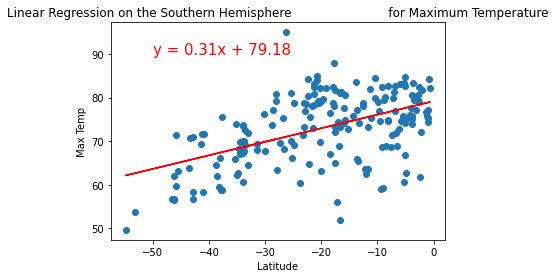

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

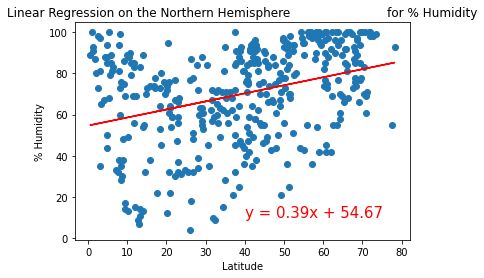

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

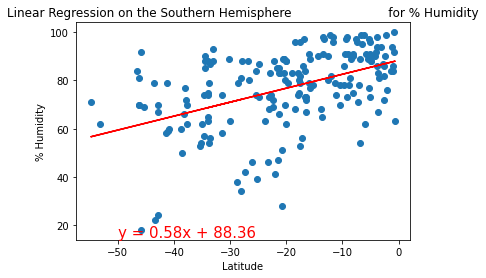

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

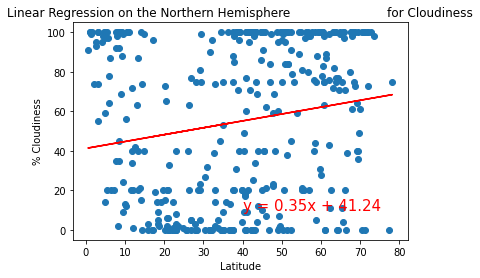

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(40,10))

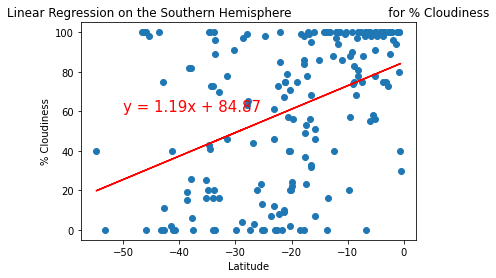

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


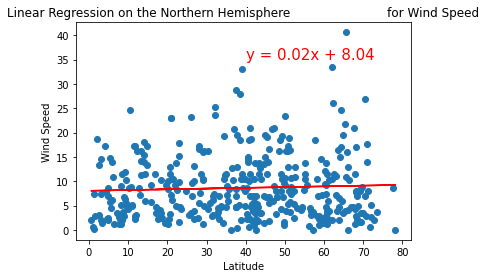

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

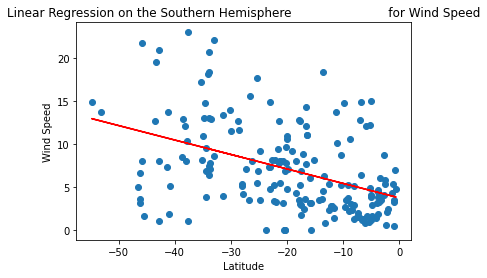

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))